# Calling image classification model from Docker

In [1]:
import datetime
import docker
import gradio as gr
import requests
import sys
import time

from PIL import Image

C:\Users\seretkow\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [3]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 19-Dec-2024 15:06:15


## Docker

In [6]:
docker_model_endpoint = "http://127.0.0.1:5000/image"

In [7]:
try:
    response = requests.get("http://127.0.0.1:5000")
    respcode = response.status_code
    if respcode == 200:
        print(f"OK. Status code = {respcode}")
    else:
        print(f"Failed to get status. Status code: {respcode}")

except requests.exceptions.RequestException as e:
    print(f"Request failed: {e}")

Request failed: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002479C7A0580>: Failed to establish a new connection: [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée'))


In [7]:
docker_client = docker.from_env()
docker_client

In [8]:
print("Active Docker container(s):\n")

for idx2, container in enumerate(docker_client.containers.list(), start=1):
    print(f"{idx2} - Docker container name: {container.name}")
    print(f"Container image: {container.image}")
    print(f"Container id: {container.id}\n")

Active Docker container(s):

1 - Docker container name: dreamy_gagarin
Container image: <Image: 'damageclassification:latest'>
Container id: 5e256cd6ed059cb6aa2c838c28075ee594f037047f922aaeb5e988c8c9d78a5d



In [9]:
print("List of all the Docker container images:\n")

for idx, image in enumerate(docker_client.images.list(), start=1):
    print(f"{idx} - Docker container image: {image}")
    print(f"Image id: {image.id}\n")

print(f"Total number of docker container images = {idx}")

List of all the Docker container images:

1 - Docker container image: <Image: 'poolsdetection:latest'>
Image id: sha256:4fdb8e47908dbf0a8f818771086806a2ad08270c19863824a5905eebedf382c8

2 - Docker container image: <Image: 'damageclassification:latest'>
Image id: sha256:3574d040b60e887389f2ecaadbd0adfa6d5230cebcbd6e0d538af4854cf5a8a8

3 - Docker container image: <Image: 'ollama/ollama:latest'>
Image id: sha256:bb26c2494105072339ee44e9b1d99df926fb20b5553393926cf98f8dd4b103af

4 - Docker container image: <Image: 'mcr.microsoft.com/azure-cognitive-services/form-recognizer/businesscard-3.0:latest'>
Image id: sha256:27e5e3045a63b221f69b7493632b478f3da0631e6a2f289b07544565ab423dd9

5 - Docker container image: <Image: 'mcr.microsoft.com/azure-cognitive-services/form-recognizer/layout-3.1:latest'>
Image id: sha256:6d835d79cebd14f9ef557b67d4087df816027a2580a6f3621f75c8314ca8e35b

6 - Docker container image: <Image: 'mcr.microsoft.com/azure-cognitive-services/form-recognizer/read-3.1:latest'>
Ima

## Function

In [10]:
def get_docker_image_classification(image_file, endpoint=docker_model_endpoint):
    """
    Sends an image to the Azure Custom vision docker deployed model and 
    displays the predictions.

    Args:
        image_file (str): The path to the image file to be classified.

    Returns:
        tuple: The name of the predicted class with the highest probability 
        and that probability.

    This function sends an image to an image classification model endpoint,
    displays all predictions with their probabilities, and highlights the 
    prediction with the highest probability. If the predicted class is "damage",
    the text is displayed in red, otherwise in green.
    """
    # Headers
    headers = {"Content-Type": "application/octet-stream"}

    # Reading image file & calling the model
    with open(image_file, "rb") as image_data:
        response = requests.post(endpoint, headers=headers, data=image_data)

    # Get results
    print("Model predictions:")
    predictions = response.json()['predictions']
    for prediction in predictions:
        print(f"- {prediction['tagName']} = {prediction['probability']:.5f}")

    max_prediction = max(predictions, key=lambda x: x['probability'])
    color_code = "\033[1;31;91m" if max_prediction[
        'tagName'] == "damage" else "\033[1;31;32m"
    print(color_code)
    print(
        f"Prediction: {max_prediction['tagName']} with score = {max_prediction['probability']:.5f}"
    )
    print("\033[1;31;34m")

    return predictions

## Testing

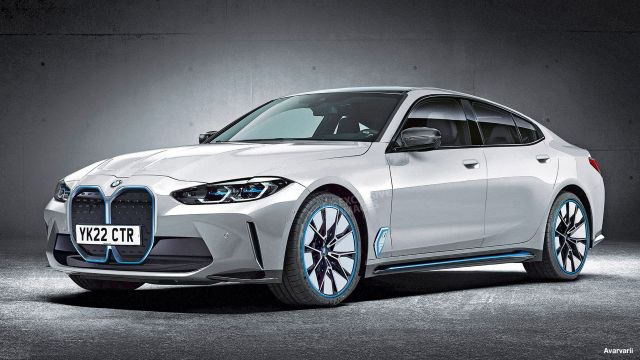

In [11]:
image_file = "images/car1.jpg"

img = Image.open(image_file)
img

In [12]:
start = time.time()
predictions = get_docker_image_classification(image_file)
print(f"Done in {time.time() - start:5f} seconds")

Model predictions:
- damage = 0.03760
- no_damage = 0.96240

Prediction: no_damage with score = 0.96240

Done in 0.054670 seconds


In [13]:
predictions

[{'boundingBox': None,
  'probability': 0.03760097,
  'tagId': '',
  'tagName': 'damage'},
 {'boundingBox': None,
  'probability': 0.96239907,
  'tagId': '',
  'tagName': 'no_damage'}]

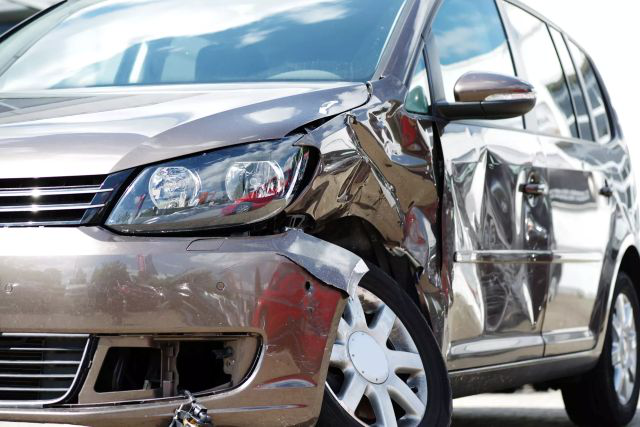

In [14]:
image_file = "images/car2.jpg"

img = Image.open(image_file)
img

In [15]:
start = time.time()
get_docker_image_classification(image_file)
print(f"Done in {time.time() - start:5f} seconds")

Model predictions:
- damage = 0.70835
- no_damage = 0.29165

Prediction: damage with score = 0.70835

Done in 0.059214 seconds


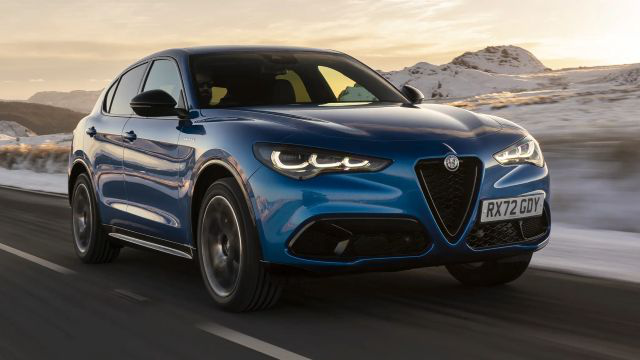

In [16]:
image_file = "images/car3.jpg"

img = Image.open(image_file)
img

In [17]:
start = time.time()
get_docker_image_classification(image_file)
print(f"Done in {time.time() - start:5f} seconds")

Model predictions:
- damage = 0.02070
- no_damage = 0.97930

Prediction: no_damage with score = 0.97930

Done in 0.068091 seconds


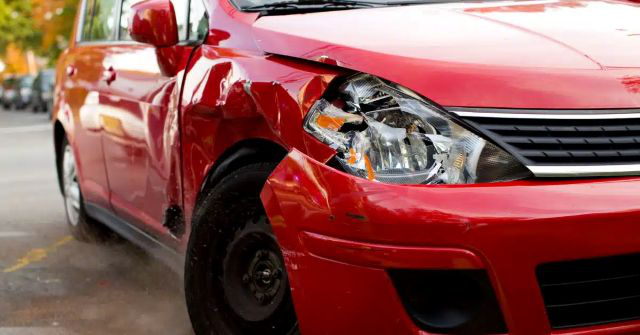

In [18]:
image_file = "images/car4.jpg"

img = Image.open(image_file)
img

In [19]:
start = time.time()
get_docker_image_classification(image_file)
print(f"Done in {time.time() - start:5f} seconds")

Model predictions:
- damage = 0.84039
- no_damage = 0.15961

Prediction: damage with score = 0.84039

Done in 0.056691 seconds


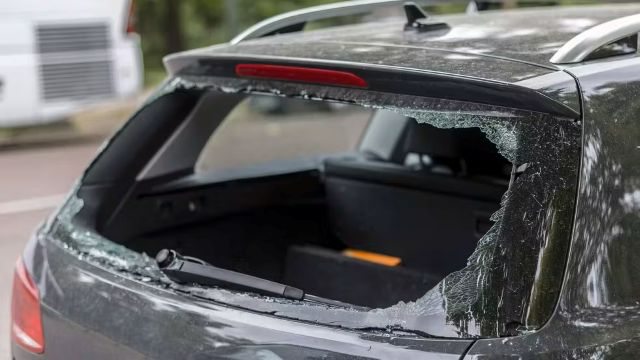

In [20]:
image_file = "images/car5.jpg"

img = Image.open(image_file)
img

In [21]:
start = time.time()
get_docker_image_classification(image_file)
print(f"Done in {time.time() - start:5f} seconds")

Model predictions:
- damage = 0.77668
- no_damage = 0.22332

Prediction: damage with score = 0.77668

Done in 0.065003 seconds


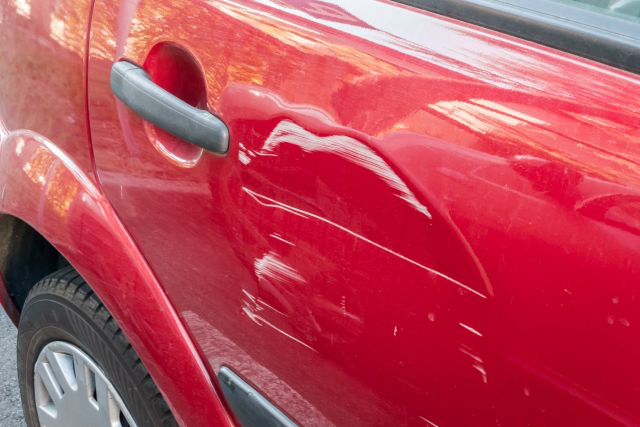

In [22]:
image_file = "images/car6.jpg"

img = Image.open(image_file)
img

In [23]:
start = time.time()
get_docker_image_classification(image_file)
print(f"Done in {time.time() - start:5f} seconds")

Model predictions:
- damage = 0.61861
- no_damage = 0.38139

Prediction: damage with score = 0.61861

Done in 0.058851 seconds


## WebApp

In [24]:
def get_docker_image_classification_fn(image):
    """
    Classifies a Docker image using an image classification model.

    Args:
        image: The Docker image to classify.

    Returns:
        dict: A dictionary where the keys are the class labels and the values 
        are the associated probabilities.
    """
    predictions = get_docker_image_classification(image)
    label = [item['tagName'] for item in predictions]
    score = [item['probability'] for item in predictions]

    return {label[i]: float(score[i]) for i in range(len(label))}

In [25]:
title = "Image classification Docker deployed model using Azure Custom Vision"

samples = [
    "images/car1.jpg",
    "images/car2.jpg",
    "images/car3.jpg",
    "images/car4.jpg",
    "images/car5.jpg",
    "images/car6.jpg",
]

webapp = gr.Interface(
    fn=get_docker_image_classification_fn,
    inputs=gr.Image(type="filepath", label="Upload an image to classify"),
    outputs=gr.Label(num_top_classes=2, label="Classification results"),
    title=title,
    examples=samples,
)

webapp.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
